In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import seaborn as sns
import process_data.directions_coordinates as dc
import process_data.duplicate_and_overlap as do
import process_data.sincos as sincos
import process_data.plot_polymer_histgram as my_plot
import functions as func
# import process_data.n_n_distance as nn
import json
from tqdm.auto import tqdm
import fnn.four_layers as model

GeneratorNet(
  (hidden0): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.2, inplace=False)
  )
  (out): Sequential(
    (0): Linear(in_features=64, out_features=30, bias=True)
    (1): Tanh()
  )
)


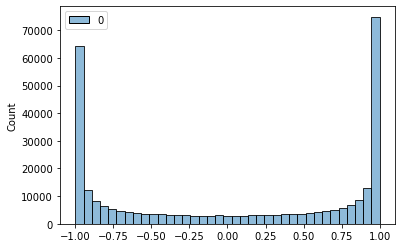

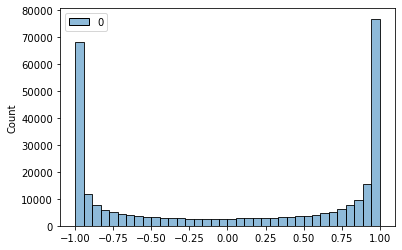

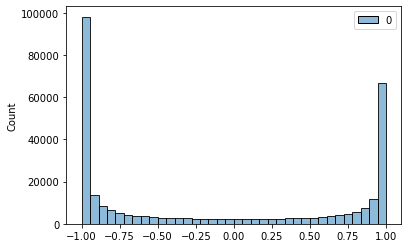

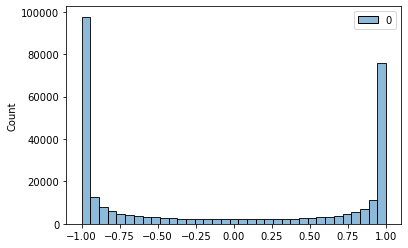

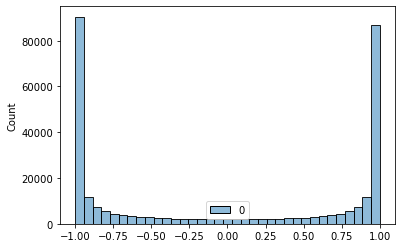

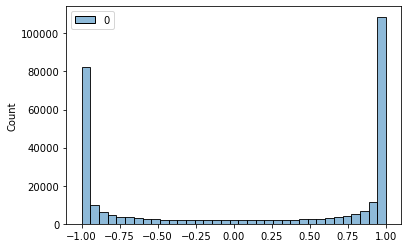

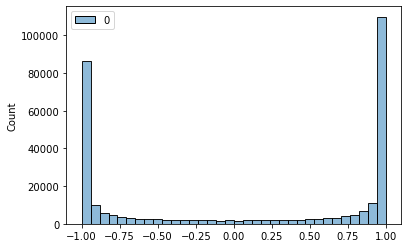

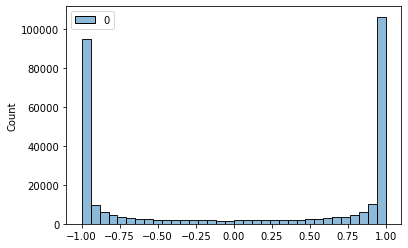

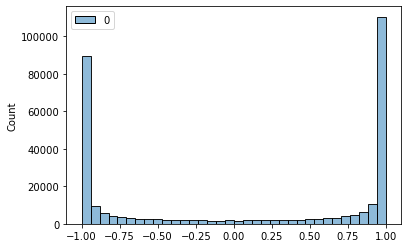

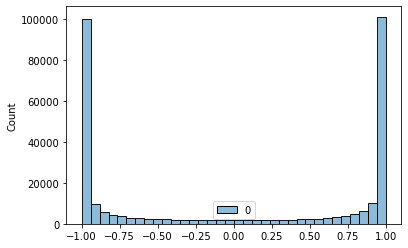

In [27]:
num_polymer = 10000
z_dim = 8
folder_name = '11_17'
polymer_len = 16
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
print(generator)
for i in range(500, 5100, 500):
# i = 5000
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load('../experiments/'+ folder_name + f'/off_lattices_{polymer_len}/four_layers_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    sns.histplot(output.reshape(-1,1))
    plt.show()

### How to add

In [6]:
noise = func.get_noise(2, 8)
fake = generator(noise)
print(fake)

tensor([[ 1.0000, -1.0000,  1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
         -1.0000,  1.0000, -1.0000,  1.0000,  1.0000, -1.0000,  1.0000, -1.0000,
          1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
          1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  1.0000, -1.0000,
          1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
         -1.0000,  1.0000,  1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
          1.0000, -1.0000, -1.0000,  1.0000, -1.0000,  1.0000,  1.0000, -1.0000,
          1.0000, -1.0000,  1.0000, -1.0000, -1.0000,  1.0000,  1.0000, -1.0000,
          1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,
         -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
          1.0000, -1.0000, -1.0000,  1.0000,  1.0000, -1.0000, -1.0000,  1.0000,
         -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
         -1.0000,  1.0000,  

In [7]:
fake_sin_cos = fake.view([2,62,2])

In [8]:
print(fake_sin_cos)

tensor([[[ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [-1.0000,  1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [ 1.0000, -1.0000],
         [ 1.0

In [9]:
b = torch.sum(fake_sin_cos ** 2,dim=2)
print(b)

tensor([[2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 1.9974, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000,
         2.0000, 2.0000, 2.0000, 2.

In [10]:
(b - 1) ** 2

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9949, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.

In [11]:
torch.sum((b - 1) ** 2, dim = 1)

tensor([61.9949, 62.0000], grad_fn=<SumBackward1>)

In [45]:
for name, param in generator.named_parameters():
    if param.requires_grad:
        print (name, param.data)


hidden0.0.weight tensor([[ 0.1323, -0.0556, -0.0548,  ..., -0.1755, -0.1465,  0.0242],
        [ 0.0363, -0.1144, -0.1193,  ..., -0.2229, -0.1650, -0.1389],
        [-0.0034,  0.0503, -0.0350,  ..., -0.0111,  0.0199, -0.0084],
        ...,
        [-0.2219, -0.1745, -0.0403,  ...,  0.1062,  0.0916, -0.1202],
        [ 0.0230,  0.0177,  0.0041,  ..., -0.0184, -0.0140,  0.0033],
        [-0.0143, -0.1319,  0.2002,  ..., -0.0414, -0.1098, -0.1231]])
hidden0.0.bias tensor([-0.1760,  0.1599, -0.1249, -0.1668, -0.2642,  0.0755, -0.3490,  0.1081,
        -0.3066, -0.0945, -0.2761, -0.1915, -0.0793, -0.1832, -0.3624, -0.3624,
        -0.1449,  0.1213, -0.2174, -0.0424, -0.1528,  0.1584, -0.1143,  0.1350,
        -0.2015, -0.1844,  0.0854, -0.0315,  0.1084,  0.0665,  0.0895,  0.1606,
        -0.3280, -0.2417, -0.0734,  0.2544, -0.0149,  0.1326,  0.1891,  0.0049,
         0.2219, -0.3516, -0.2505, -0.2931, -0.2332, -0.1200, -0.0191,  0.1068,
        -0.1448,  0.0740,  0.2268,  0.1519, -0.2580,  

In [4]:
noise = func.get_noise(1, 8)
b = generator(noise)

tensor([[-4.1036e-02,  5.0074e-01, -1.3039e-02, -1.6887e-02, -5.1601e-02,
          2.1541e-01, -6.8582e-02,  1.1787e-01, -1.8249e-02, -2.7916e-02,
         -9.9903e-03, -2.3308e-02, -6.5576e-02, -3.6020e-02, -1.4332e-01,
          5.8643e-02, -3.4884e-02,  4.6124e-01, -3.1823e-02, -2.2024e-02,
         -1.0937e-02,  2.3250e-01, -4.8056e-02,  4.0861e-01, -5.0016e-02,
         -2.8503e-03,  1.9267e-01, -1.1157e-01,  2.9055e-01,  1.8805e-01,
         -8.4527e-02,  6.4514e-01,  4.2159e-01, -9.1662e-02, -1.5937e-02,
          3.9029e-01, -1.3721e-02, -2.7023e-02,  4.6025e-01, -2.6456e-02,
          4.3785e-01, -7.1900e-02, -8.7962e-02, -8.1168e-02, -3.3812e-02,
         -6.9199e-02, -4.9324e-02,  1.3400e-02, -4.0336e-03,  2.9230e-01,
          4.3285e-01, -2.1665e-02, -5.4142e-03, -4.8101e-02, -3.0805e-02,
         -4.4368e-02, -4.1152e-03, -7.3788e-02,  4.8549e-01, -1.6469e-01,
         -1.4024e-02,  5.4878e-01, -6.8021e-02, -6.5062e-02,  5.6003e-02,
         -3.4475e-02, -5.0438e-02,  1.

In [15]:
with open('../experiments/11_17/off_lattices_16/four_layers_gen.json', 'r') as g:
    data_g = json.load(g)
with open('../experiments/11_17/off_lattices_16/four_layers_disc.json', 'r') as d:
    data_d = json.load(d)

In [18]:
a = []
b = []
for key, value in data_g.items():
    a += data_g[key]
    b += data_d[key]

(0.0, 5.0)

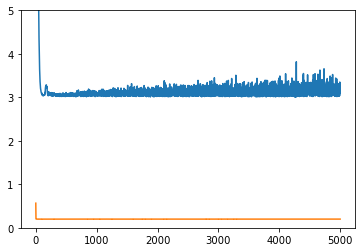

In [24]:
plt.plot(a)
plt.plot(b)
plt.ylim(0, 5)
# plt.xlim(0, 100)

In [25]:
b[-1]


0.20010156975579016